<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import re

NLP2_1
https://www.hackerrank.com/challenges/detect-the-email-addresses/problem?isFullScreen=true

In [13]:
p = re.compile('[_0-9a-zA-Z]+[_\.0-9a-zA-Z]*@[0-9a-zA-Z_]+[\.0-9a-zA-Z_]+[0-9a-zA-Z_]+')
n = int(input())
l = []
for i in range(n):
    x = str(input())
    r = re.findall(p, x)
    for z in r:
        if(z not in l):
            l.append(z)
l.sort()
for i in range(len(l)):
    if(i == len(l)-1):
        print(l[i])
    else:
        print(l[i],end=";")

3
Please contact us at givinginfo@ngs.org or call +1 202 862 8638 
email us at ngsdigital@customersvc.com or call 1-800-895-2068. You can also 
Customer service is also available online at ngsline@customersvc.com.
givinginfo@ngs.org;ngsdigital@customersvc.com;ngsline@customersvc.com


NLP2_2 https://www.hackerrank.com/challenges/detect-the-domain-name/problem?isFullScreen=true

In [21]:
regex = re.compile('(http|https)\\://(www.|ww2.|)([a-zA-Z0-9\\-\\.]+)(\\.[a-zA-Z]+)(/\\S*)?')
s = set()
for i in range(int(input())):
    string = input()
    iterator = regex.finditer(string)
    if iterator:
        for match in iterator:
            s.add(match.group(3)+match.group(4))
print(';'.join(t for t in sorted(s)))

4
<div class="reflist" style="list-style-type: decimal;">
<li id="cite_note-1"><span class="mw-cite-backlink"><b>^ ["Train (noun)"](http://www.askoxford.com/concise_oed/train?view=uk). <i>(definition – Compact OED)</i>. Oxford University Press<span class="reference-accessdate">. Retrieved 2008-03-18</span>.</span><span title="ctx_ver=Z39.88-2004&rfr_id=info%3Asid%2Fen.wikipedia.org%3ATrain&rft.atitle=Train+%28noun%29&rft.genre=article&rft_id=http%3A%2F%2Fwww.askoxford.com%2Fconcise_oed%2Ftrain%3Fview%3Duk&rft.jtitle=%28definition+%E2%80%93+Compact+OED%29&rft.pub=Oxford+University+Press&rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal" class="Z3988"><span style="display:none;"> </span></span></span></li>
<li id="cite_note-2"><span class="mw-cite-backlink"><b>^</b></span> <span class="reference-text"><span class="citation book">Atchison, Topeka and Santa Fe Railway (1948). <i>Rules: Operating Department</i>. p. 7.</span><span title="ctx_ver=Z39.88-2004&rfr_id=info%3Asid%2Fen.wikipedia.

NLP2_3 Реализовать классификатор токсичных комментариев tfidf на базе датасета
https://www.kaggle.com/datasets/blackmoon/russian-language-toxic-comments  

Дубликат файла: https://cloud.mail.ru/public/Z4L3/vB8GcgTtK



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DNS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
df = pd.read_csv("./labeled.csv", sep=",")

In [36]:
df.shape

(14412, 2)

In [37]:
df.head(10)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
5,Для каких стан является эталоном современная с...,1.0
6,В шапке были ссылки на инфу по текущему фильму...,0.0
7,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1.0
8,"Ебать тебя разносит, шизик.\n",1.0
9,"Обосрался, сиди обтекай\n",1.0


In [38]:
df["toxic"] = df["toxic"].apply(int)
df.head(10)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1
5,Для каких стан является эталоном современная с...,1
6,В шапке были ссылки на инфу по текущему фильму...,0
7,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1
8,"Ебать тебя разносит, шизик.\n",1
9,"Обосрался, сиди обтекай\n",1


In [39]:
df["toxic"].value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [40]:
for c in df[df["toxic"] == 1]["comment"].head(5):
    print(c)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



In [41]:
for c in df[df["toxic"] == 0]["comment"].head(5):
    print(c)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [42]:
train_df, test_df = train_test_split(df, test_size=500)

In [43]:
test_df.shape

(500, 2)

In [44]:
test_df["toxic"].value_counts()

0    356
1    144
Name: toxic, dtype: int64

In [45]:
train_df["toxic"].value_counts()

0    9230
1    4682
Name: toxic, dtype: int64

In [46]:
import nltk
nltk.download('stopwords')
sentence_example = df.iloc[20]["comment"]
tokens = word_tokenize(sentence_example, language="russian")
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words("russian")
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language="russian")
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DNS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
print(f"Исходный текст: {sentence_example}")
print("-----------------")
print(f"Токены: {tokens}")
print("-----------------")
print(f"Токены без пунктуации: {tokens_without_punctuation}")
print("-----------------")
print(f"Токены без пунктуации и стоп слов: {tokens_without_stop_words_and_punctuation}")
print("-----------------")
print(f"Токены после стемминга: {stemmed_tokens}")
print("-----------------")

Исходный текст: Ну, посмотрел я комментарии к твоим постам, процент говнокомментов ниже средней отметки.

-----------------
Токены: ['Ну', ',', 'посмотрел', 'я', 'комментарии', 'к', 'твоим', 'постам', ',', 'процент', 'говнокомментов', 'ниже', 'средней', 'отметки', '.']
-----------------
Токены без пунктуации: ['Ну', 'посмотрел', 'я', 'комментарии', 'к', 'твоим', 'постам', 'процент', 'говнокомментов', 'ниже', 'средней', 'отметки']
-----------------
Токены без пунктуации и стоп слов: ['Ну', 'посмотрел', 'комментарии', 'твоим', 'постам', 'процент', 'говнокомментов', 'ниже', 'средней', 'отметки']
-----------------
Токены после стемминга: ['ну', 'посмотрел', 'комментар', 'тво', 'пост', 'процент', 'говнокоммент', 'ниж', 'средн', 'отметк']
-----------------


In [48]:
snowball = SnowballStemmer(language="russian")
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [49]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

In [50]:
features = vectorizer.fit_transform(train_df["comment"])

In [51]:
model = LogisticRegression(random_state=482)
model.fit(features, train_df["toxic"])

LogisticRegression(random_state=482)

In [52]:
model.predict(features[10])

array([0], dtype=int64)

In [53]:
train_df["comment"].iloc[10]

'вы растекаетесь по всей борде лишим вас загончика, чтобы это на самом деле стало правдой А ты хитер.\n'

In [54]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
]
)

In [55]:
model_pipeline.fit(train_df["comment"], train_df["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001D66B5354C0>)),
                ('model', LogisticRegression(random_state=0))])

In [56]:
model_pipeline.predict(["Да,интересная тема для беседы"])

array([0], dtype=int64)

In [57]:
model_pipeline.predict(["Хрень какая-то идите вы лесом"])

array([1], dtype=int64)

In [58]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict(test_df["comment"]))

0.8910891089108911

In [59]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict(test_df["comment"]))

0.625

In [60]:
prec, rec, thresholds = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1])

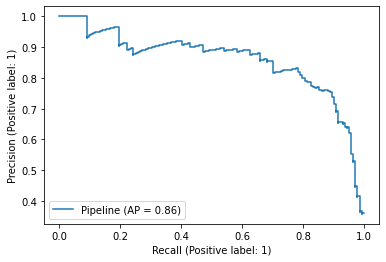

In [61]:
plot_precision_recall_curve(estimator=model_pipeline, X=test_df["comment"], y=test_df["toxic"])

In [62]:
np.where(prec > 0.92)

(array([336, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380,
        381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393,
        394, 395, 396, 397, 398, 399], dtype=int64),)

In [63]:
thresholds[336]

0.6288041383552372

In [65]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[336])

0.9193548387096774

In [66]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[336])

0.3958333333333333

In [70]:
grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", 
     GridSearchCV(
        LogisticRegression(random_state=482),
        param_grid={'C': [0.1, 1, 10.]},
        cv=3,
         verbose=4
        )
    )
])

In [71]:
grid_pipeline.fit(train_df["comment"], train_df["toxic"])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ..........................................C=0.1; total time=   1.0s
[CV 2/3] END ..........................................C=0.1; total time=   0.7s
[CV 3/3] END ..........................................C=0.1; total time=   0.5s
[CV 1/3] END ............................................C=1; total time=   1.1s
[CV 2/3] END ............................................C=1; total time=   0.7s
[CV 3/3] END ............................................C=1; total time=   0.8s


C:\Users\DNS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END .........................................C=10.0; total time=   2.4s


C:\Users\DNS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END .........................................C=10.0; total time=   2.5s


C:\Users\DNS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END .........................................C=10.0; total time=   3.4s


C:\Users\DNS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001D66E4B9E50>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=482),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [72]:
model_pipeline_c_10 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0, C=10.))
]
)

In [73]:
model_pipeline_c_10.fit(train_df["comment"], train_df["toxic"])

C:\Users\DNS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001D665457F70>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [74]:
prec_c_10, rec_c_10, thresholds_c_10 = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1])

In [75]:
np.where(prec_c_10 > 0.92)

(array([343, 344, 345, 346, 347, 348, 349, 350, 354, 355, 356, 357, 358,
        359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
        372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
        385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
        398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
        411, 412, 413], dtype=int64),)

In [76]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[343])

0.927536231884058

In [77]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[343])

0.4444444444444444